# Image Enhancement
##  Fourier transform by Numpy
>  The FFT package in Numpy can help us realize fast Fourier transform (FFT)
> *``` np.fft.fft2()``` Perform image frequency transform, and the output result is a complex array
> * The first parameter is the input image, which is required to be a gray image
> * The second parameter is optional, which determines the array size 

>  Using the above function, we get the result that the part with low frequency of 0 is in the upper left corner of the output image. If we want it to be in the center of the output image, we need to translate the result in two directions.
> * ``` np.fft.fftshift()``` Transfer the zero frequency component in the image spectrum to the center of the frequency domain image

>  After FFT, the amplitude spectrum can be abtained.
> * After FFT, we get a complex array. In order to display the frequency image, we need to adjust the gray values to the space of [0255], that is, use the formula 20*np.log(np.abs(x))

Text(0.5,1,'no_fshift_img')

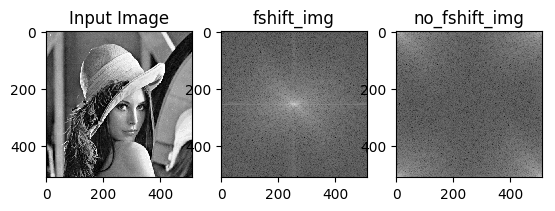

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("data/lenna.bmp",0)

# fast Fourier transform (FFT)
f=np.fft.fft2(img)
#print(f)
fshift=np.fft.fftshift(f)
#print(fshift)

fshift_img=20*np.log(np.abs(fshift)) 
# magnitude of 'fshift', if x=3+4j result = abs(x);print(result) # result = 5.0 
#print(fshift_img)

no_fshift_img=20*np.log(np.abs(f))
#print(no_fshift_img)

#plt.subplot(131) is the same with plt.subplot(1,3,1)
plt.subplot(131);plt.imshow(img,"gray")
plt.title('Input Image')
plt.subplot(132);plt.imshow(fshift_img,"gray")
plt.title('fshift_img')
plt.subplot(133);plt.imshow(no_fshift_img,"gray")
plt.title('no_fshift_img')


##  Inverse fourier transform by Numpy
> * ``` np.fft.ifftshift()``` Move the low frequency component to the top left position
> * ``` np.ifft2()``` Inverse Fourier transform, the value return is still a complex array
> * ``` np.abs(x）``` Amagnitude of x

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

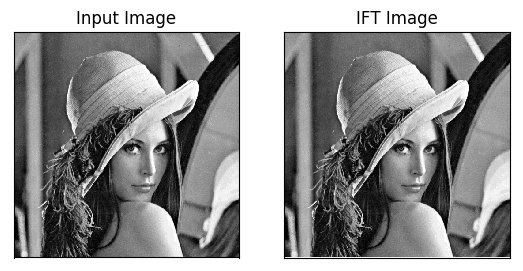

In [4]:
import cv2                                                                       
import numpy as np 
import matplotlib.pyplot as plt

# IFFT following the above operation
f_ishift=np.fft.ifftshift(fshift)
img_back=np.fft.ifft2(f_ishift)
img_back_abs=np.abs(img_back)

# plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,"gray")
plt.title('Input Image')
plt.xticks([]),plt.yticks([])
plt.subplot(122),plt.imshow(img_back_abs,"gray")
plt.title('IFT Image')
plt.xticks([]),plt.yticks([])



##  Fourier transform by OpenCV
>  ```cv2.dft()```  and ``` cv2.idft()```
> * ```cv2. dft()```is consistent with the result obtained by np.fft.fft2(), but the value returned by cv2. dft() is dual channel - channel 1 is the real part, and channel 2 is the imaginary part 
>  * ```cv2.dft(image，flags ）``` The input image must use ` ` ` np Float32() ` ` ` The function converts the image to the np.float32 format. The value of the flage is usually ` ` cv2.DFT_ COMPLEX_ OUTPUT ` ` ` used to output a complex array
> * ```numpy. fft. fftshift()```is required to move the low frequency component to the spectrum center
> * ```cv2. magnitude()``` calculate the amplitude of spectrum
>> * return value=cv2. magic (parameter 1, parameter 2)
>>> * parameter1：real part；
>>> * parameter2：image part；
>>> * Return value: the square root of the sum of squares of parameter 1 and parameter 2
> * After FFT, we get a complex array. In order to display the frequency image, we need to adjust the gray values to the space of [0255], that is, use the formula ``20× np.log(cv2.magnitude(real，image))```
> * ```cv2.cartToPolar()```，Cartesian coordinate system is converted to the polar coordinate system, it will return the amplitude and phase at the same time.
> * IFFT，```np.fft.ifftshift()```——``cv2.idft()```——```cv.magnitude（）```



使用OpenCV进行傅里叶变换
> ```cv2.dft()```和```cv2.idft()```
> * ```cv2.dft()```与np.fft.fft2()得到的结果一致，但与cv2.dfy()返回的值是双信道----channel1是实部，channel2是虚部
> * ```cv2.dft(image,flags)```输入图像必须使用```np.float32()```该函数将图像转换为np.float32格式。标志的值通常是```cv2.DFT_COMPLEX_OUTPUT```用于输出复杂数组
> * ```numpy.fft.fftshift()```需要将低频分量移动到频谱中心
> * ```cv2.magnitude()```计算频谱的振幅
>> * 返回值=cv2.magic(参数1，参数2)
>>> * parameter1:实部;
>>> * parameter2:图像部分;
>>> *返回值:参数1与参数2平方和的平方根
> * FFT之后，我们得到一个复杂数组。为了显示频率图像，我们需要将灰度值调整到[0,255]的空间，即使用公式  ```20× np.log(cv2.magnitude(real,image))```
> * ```cv2.cartToPolar()```，笛卡尔坐标系转换为极坐标，会同时返回振幅和相位。
> * IFFT,```np.fft.ifftshift()```—— ```cv2.idft ()```——```cv.magnitude ()```

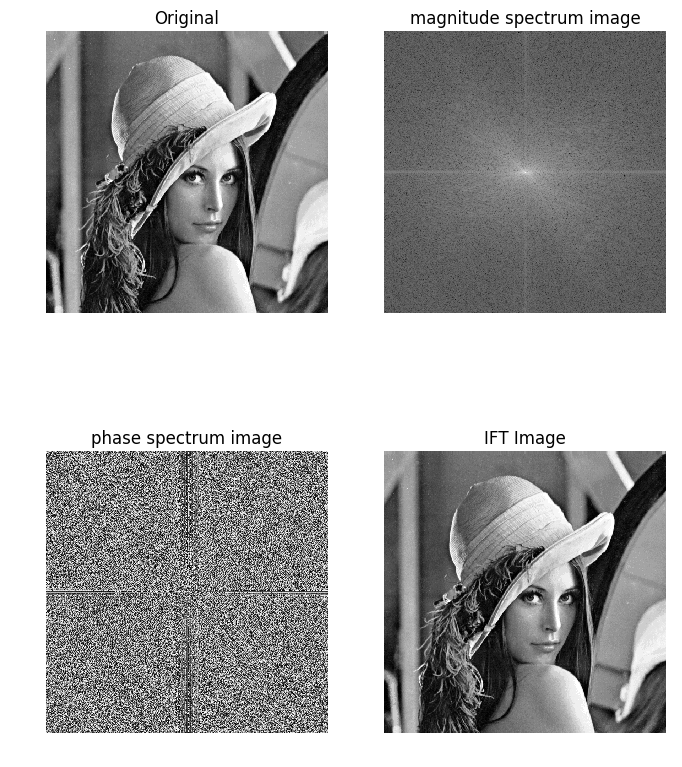

In [5]:
#show the original image, magnitude spectrum image, phase image, and the results of IFFT
import numpy as np
import cv2
import matplotlib.pyplot  as plt
img=cv2.imread("data/lenna.bmp",0)

# FFT
dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT) # 2 chanls:1-real,2-image
#print(dft)

# FFTshift
dft_shift=np.fft.fftshift(dft)
#print(dft_shift)

# get ‘magnitude spectrum image’ and ‘phase image’
mag,angle=cv2.cartToPolar(dft_shift[:,:,0],dft_shift[:,:,1],angleInDegrees=True)

# show mag and angle
# angle_img=20*np.log(angle)
mag_img=20*np.log(mag)


# IFFT
dft_ishift=np.fft.ifftshift(dft_shift)
img_back = cv2.idft(dft_ishift)
img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

Images=[img,mag_img,angle,img_back]
titles=['Original','magnitude spectrum image','phase spectrum image','IFT Image']
# magnitude spectrum image幅度谱图像
# phase spectrum image 相位谱图像


plt.figure(figsize=(8,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(Images[i],cmap='gray')
    plt.title(titles[i])
    plt.axis("off")


## Phase spectrum and amplitude spectrum相位谱和振幅谱

> * The amplitude spectrum of an image represents the brightness information of each pixel in the image, but the amplitude spectrum produced does not show which point is in the original image. That is, although the amplitude spectrum stores the amplitude information of each pixel, the position of the original pixel has been disturbed, so it is impossible to reconstruct the original image only by the amplitude spectrum.
> * The phase spectrum records the phase information of all pxcels. It seems that the phase spectrum is noise image, which shows that the phase information appears in a more hidden way and is very important. Because it will not be able to reconstruct the original image from the spectrum without phase .
> * Therefore, the original image can be recovered by using the position information recorded by the phase spectrum and the brightness information recorded by the amplitude spectrum



#### exercise 1

* Transform the two images（‘lenna.bmp’ and ‘fruits.bmp’） into frequency domain.
* Then get the ‘magnitude spectrum image’ and the ‘phase spectrum image’ respectively.
* Next, exchange the 'phase spectrum image' of the two images, and then make an inverse frequency transformation. 
* Compare the images before and after the exchange, give some explanation of the magnitude spectrum and phase spectrum contributions to image formation.

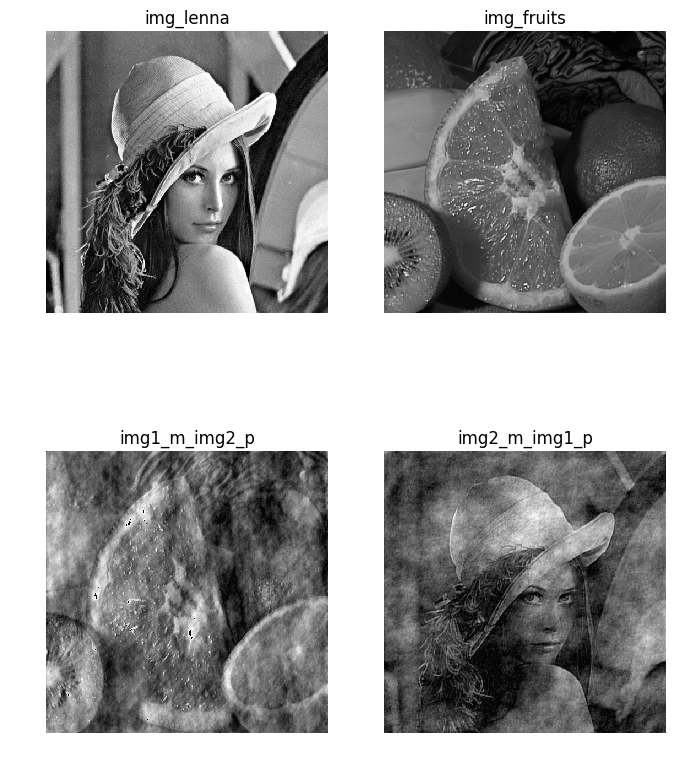

In [11]:
##### coding here......

#show the original image, magnitude spectrum image, phase image, and the results of IFFT
import numpy as np
import cv2
import matplotlib.pyplot as plt
img_lenna = cv2.imread("data/lenna.bmp",0)
img_fruits =  cv2.imread("data/fruits.bmp",0)

img_lenna = cv2.resize(img_lenna,(512,512))
img_fruits = cv2.resize(img_fruits,(512,512))

# FFT
dft_1 = cv2.dft(np.float32(img_lenna),flags=cv2.DFT_COMPLEX_OUTPUT) # 2 chanls:1-real,2-image
dft_2 = cv2.dft(np.float32(img_fruits),flags=cv2.DFT_COMPLEX_OUTPUT)
#print(dft)


# # FFTshift(中心化)
# dft_shift_1=np.fft.fftshift(dft_1)
# dft_shift_2=np.fft.fftshift(dft_2)
# #print(dft_shift)

# get ‘magnitude spectrum image’ and ‘phase image’
mag_1,angle_1 = cv2.cartToPolar(dft_1[:,:,0],dft_1[:,:,1],angleInDegrees=False)
mag_2,angle_2 = cv2.cartToPolar(dft_2[:,:,0],dft_2[:,:,1],angleInDegrees=False)

# # show mag and angle
# angle_img_1=20*np.log(angle_1)
# angle_img_1=20*np.log(angle_2)
# mag_img_1=20*np.log(mag_1)
# mag_img_2=20*np.log(mag_2)

def magnitude_phase_combine(img_m,img_p):
    # 不同图像幅度谱与相位谱结合
    img_m_p = img_m*np.e**(1j*img_p)
    # 图像重构
    img_m_p = np.uint8(np.abs(np.fft.ifft2(img_m_p)))
    img_m_p =img_m_p/np.max(img_m_p)*255
    return img_m_p
# step3-4
img1_m_img2_p = magnitude_phase_combine(mag_1,angle_2)
img2_m_img1_p = magnitude_phase_combine(mag_2,angle_1)


# Images=[img,mag_img,angle,img_back]
Images=[img_lenna,img_fruits,img1_m_img2_p,img2_m_img1_p]
titles=['img_lenna','img_fruits','img1_m_img2_p','img2_m_img1_p']
plt.figure(figsize=(8,10))
# magnitude spectrum image幅度谱图像
# phase spectrum image 相位谱图像

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(Images[i],cmap='gray')
    plt.title(titles[i])
    plt.axis("off")


# Low-pass filters and High-pass filters in frequency domain 
#### 频率域的低通滤波器和高通滤波器

## ILPF & IHPF

> * The ideal frequency domain filter has the cut-off characteristic of steep frequency (straight up and down), which will cause ringing phenomenon and blur the image.

> * H(u,v) is the filter 


In [ ]:
# ILPF & IHPF
# D0: thresholde
def idealFilter(img,D0,type='ILPF'):
    dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift=np.fft.fftshift(dft)
    rows,cols=img.shape
    crow,ccol=int(rows/2),int(cols/2)
    mask=np.zeros((rows,cols,2))
    for i in range(rows):
        for j in range(cols):
            D=np.sqrt((i-crow)**2+(j-ccol)**2)
            if type=='ILPF':
                if D<=D0:
                    mask[i,j]=1
            elif type=='IHPF':
                if D>D0:
                    mask[i,j]=1
    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])  
    return img_back

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("data/lenna.bmp",0)
img_ILPF=idealFilter(img,45,type='ILPF')
img_IHPF=idealFilter(img,45,type='IHPF')

plt.figure(figsize=(10,12))
Images=[img,img_ILPF,img_IHPF]
titles=['Original','ILPF','IHPF']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(Images[i],cmap='gray')
    plt.title(titles[i])
    plt.axis("off")


#### exercise: 
> * It is easy to observe the ringing in the filtered image. Now please adjust the size of D0 to observe and experience the role of the ideal filter.

## BLPF & BHPF

In [ ]:
## BLPF & BHPF
# Here, N represents the order (second order is used by default)
def butterworthFilter(img,D0,N=2,type='BLPF'):
    dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift=np.fft.fftshift(dft)
    rows,cols=img.shape
    crow,ccol=int(rows/2),int(cols/2)
    mask=np.zeros((rows,cols,2))
    for i in range(rows):
        for j in range(cols):
            D=np.sqrt((i-crow)**2+(j-ccol)**2)
            if type=='BLPF':
                mask[i,j]=1/(1+(D/D0)**(2*N))
            if D!=0 and type=='BHPF' :
                mask[i,j]=1/(1+(D0/D)**(2*N))

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])  
    return img_back

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("data/lenna.bmp",0)
img_BLPF=butterworthFilter(img,45,N=2,type='BLPF')
img_BHPF=butterworthFilter(img,45,N=2,type='BHPF')

plt.figure(figsize=(10,12))
Images=[img,img_BLPF,img_BHPF]
titles=['Original','BLPF','BHPF']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(Images[i],cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
    

#### exercise: 
> * Please try to use different orders for filtering, and observe the ringing in combination with the image of the above ideal filtering function

## GLPF & GHPF


In [ ]:
# GLPF & GHPF
def GaussianFilter(img,D0,type='GLPF'):
    dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift=np.fft.fftshift(dft)
    rows,cols=img.shape
    crow,ccol=int(rows/2),int(cols/2)
    mask=np.zeros((rows,cols,2))
    for i in range(rows):
        for j in range(cols):
            D=np.sqrt((i-crow)**2+(j-ccol)**2)
            if type=='GLPF':
                mask[i, j] = np.exp(-(D * D) / (2 * D0 * D0))
            if type=='GHPF' :
                mask[i, j] = (1 - np.exp(-(D * D) / (2 * D0 * D0)))

    fshift = dft_shift * mask
    f_ishift = np.fft.ifftshift(fshift)
    img_back = cv.idft(f_ishift)
    img_back = cv.magnitude(img_back[:, :, 0], img_back[:, :, 1])  
    return img_back

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread("data/lenna.bmp",0)
img_GLPF=butterworthFilter(img,45,N=2,type='BLPF')
img_GHPF=butterworthFilter(img,45,N=2,type='BHPF')

plt.figure(figsize=(10,12))
Images=[img,img_GLPF,img_GHPF]
titles=['Original','GLPF','GHPF']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(Images[i],cmap='gray')
    plt.title(titles[i])
    plt.axis("off")
    

#### exercise: 
> * Please using different cut-off frequencies and observe the experimental results 

# Bandreject/Bandrepass filters & Notch filters  


## Bandreject Filter

In [ ]:
# Bandreject filters
#radius: distance from the center of the band to the origin of the frequency plane
#width: bandwidth

def bandstop_filter(img, radius, width):
    dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift=np.fft.fftshift(dft)
    rows,cols=img.shape
    crow,ccol=int(rows/2),int(cols/2)
    mask=np.zeros((rows,cols,2))
    for i in range(rows):
        for j in range(cols):
            D=np.sqrt((i-crow)**2+(j-ccol)**2)
            if radius-width/2 < D < radius+width/2:
                mask[i,j]=0
            else:
                mask[i,j]=1
    f_shift=mask*dft_shift
    #逆变换
    f_ishift=np.fft.ifftshift(f_shift)
    img_back=cv2.idft(f_ishift)
    img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    return img_back



In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread("data/lenna.bmp",0)
image_bandstop_filtering = bandstop_filter(img, 50, 36)

Images=[img,image_bandstop_filtering]
titles=['Original','Bandstop_filter']
plt.figure(figsize=(10,12))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(Images[i],'gray')
    plt.title(titles[i])
    plt.axis("off")

## Bandpass Filter

In [ ]:
#Bandpass Filter
#radius: distance from the center of the band to the origin of the frequency plane
#width: bandwidth

def bandpass_filter(img, radius, width):
    dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
    dft_shift=np.fft.fftshift(dft)
    rows,cols=img.shape
    crow,ccol=int(rows/2),int(cols/2)
    mask=np.zeros((rows,cols,2))
    for i in range(rows):
        for j in range(cols):
            D=np.sqrt((i-crow)**2+(j-ccol)**2)
            if radius-width/2 < D < radius+width/2:
                mask[i,j]=1
            else:
                mask[i,j]=0
    f_shift=mask*dft_shift
    #逆变换
    f_ishift=np.fft.ifftshift(f_shift)
    img_back=cv2.idft(f_ishift)
    img_back=cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
    return img_back


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread("data/lenna.bmp",0)
image_bandpass_filtering = bandpass_filter(img, 40, 20)

Images=[img,image_bandpass_filtering]
titles=['Original','Bandpass_filter']
plt.figure(figsize=(10,12))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(Images[i],'gray')
    plt.title(titles[i])
    plt.axis("off")

## Notch bandpass/bandreject Filter



### Ideal Notch bandpass/bandreject Filter

In [ ]:
# Ideal Notch bandpass/bandreject Filter
def notch_filter(img_gray, u0=0, v0=0, d0=50, ftype='pass'):
    dft = cv2.dft(img_gray.astype('float32'),flags = cv2.DFT_COMPLEX_OUTPUT) 
    dft_shift = np.fft.fftshift(dft)                                    
    m, n, _ = dft_shift.shape
    mask = np.zeros_like(dft_shift)
    x_arr = np.concatenate([np.arange(m).reshape(m, 1)], axis=1)
    y_arr = np.concatenate([np.arange(n).reshape(1, n)], axis=0)
    dist1 = np.sqrt((x_arr - u0)**2 + (y_arr - v0)**2)
    u1 = m - u0
    v1 = n - v0
    dist2 = np.sqrt((x_arr - u1)**2 + (y_arr - v1)**2)
    mask[dist1 <= d0] = 1
    mask[dist2 <= d0] = 1
    if ftype != 'pass':
        mask = 1 - mask
    bpf_dft_shift = dft_shift * mask         
    magnitude_spectrum = cv2.magnitude(bpf_dft_shift[:,:,0], bpf_dft_shift[:,:,1])
    log_magnitude_spectrum = 20*np.log(magnitude_spectrum+1)
    bpf_dft = np.fft.ifftshift(bpf_dft_shift)         
    img_ = cv2.idft(bpf_dft)                           
    img_bpf = cv2.magnitude (img_[:,:,0],img_[:,:,1])
    return img_bpf, log_magnitude_spectrum


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img=cv2.imread("data/lenna.bmp",0)
img_1, log_1 = notch_filter(img, u0=50, v0=50, d0=50, ftype='pass')
img_2, log_2 = notch_filter(img, u0=50, v0=50, d0=50, ftype='stop')
Images=[log_1,img_1,log_2,img_2]
plt.figure(figsize=(10,12))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(Images[i],'gray')
    plt.axis("off")

### Butterworth Notch bandpass/bandreject Filter

In [ ]:
#Butterworth Notch bandpass/bandreject Filter
def bw_notch_filter(img_gray, u0=0, v0=0, d0=50, N=1, ftype='pass'):
    # u0, v0 is the center of one notch, and the other notch is symmetrical about the center
    dft = cv2.dft(img_gray.astype('float32'),flags = cv2.DFT_COMPLEX_OUTPUT) 
    dft_shift = np.fft.fftshift(dft)                                    
    m, n, _ = dft_shift.shape
    x_arr = np.concatenate([np.arange(m).reshape(m, 1)], axis=1)
    y_arr = np.concatenate([np.arange(n).reshape(1, n)], axis=0)
    dist1 = np.sqrt((x_arr -m//2- u0)**2 + (y_arr -n//2 - v0)**2)
    dist2 = np.sqrt((x_arr -m//2 + u0)**2 + (y_arr -n//2 + v0)**2)
    mask = 1 / (1.0 + ((d0**2)/(np.multiply(dist1, dist2)+0.000001))**N)
    if ftype == 'pass':
        mask = 1 - mask
    bpf_dft_shift = dft_shift * mask.reshape(m,n,1)     
    magnitude_spectrum = cv2.magnitude(bpf_dft_shift[:,:,0], bpf_dft_shift[:,:,1])
    log_magnitude_spectrum = 20*np.log(magnitude_spectrum)
    bpf_dft = np.fft.ifftshift(bpf_dft_shift)         
    img_ = cv2.idft(bpf_dft)                           
    img_bpf = cv2.magnitude (img_[:,:,0],img_[:,:,1])
    return img_bpf, log_magnitude_spectrum,mask

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img=cv2.imread("data/lenna.bmp",0)
img_1, log_1,mask1 = bw_notch_filter(img, u0=10, v0=50, d0=50, ftype='pass')
img_2, log_2,mask2 = bw_notch_filter(img, u0=-10, v0=-50, d0=50, ftype='stop')
Images=[img_1,log_1,mask1,img_2,log_2,mask2]
plt.figure(figsize=(10,12))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(Images[i],'gray')
    plt.axis("off")

### Gaussian Notch bandpass/bandreject Filter

In [ ]:
# Gaussian Notch bandpass/bandreject Filter
def gaussian_notch_filter(img_gray, u0=0, v0=0, d0=50, ftype='pass'):
    dft = cv2.dft(img_gray.astype('float32'),flags = cv2.DFT_COMPLEX_OUTPUT) 
    dft_shift = np.fft.fftshift(dft)                                    
    m, n, _ = dft_shift.shape
    x_arr = np.concatenate([np.arange(m).reshape(m, 1)], axis=1)
    y_arr = np.concatenate([np.arange(n).reshape(1, n)], axis=0)
    dist1 = np.sqrt((x_arr -m//2- u0)**2 + (y_arr -n//2- v0)**2)
    dist2 = np.sqrt((x_arr -m//2+ u0)**2 + (y_arr -n//2+ v0)**2)
    mask = 1 - np.exp(np.multiply(dist1, dist2)/(d0**2)*(-0.5))
    if ftype == 'pass':
        mask = 1 - mask
    bpf_dft_shift = dft_shift * mask.reshape(m, n, 1)         
    magnitude_spectrum = cv2.magnitude(bpf_dft_shift[:,:,0], bpf_dft_shift[:,:,1])
    log_magnitude_spectrum = 20*np.log(magnitude_spectrum+1)
    bpf_dft = np.fft.ifftshift(bpf_dft_shift)         
    img_ = cv2.idft(bpf_dft)                           
    img_bpf = cv2.magnitude (img_[:,:,0],img_[:,:,1])
    return img_bpf, log_magnitude_spectrum,mask


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img=cv2.imread("data/lenna.bmp",0)
img_1, log_1,mask1 = gaussian_notch_filter(img, u0=30, v0=30, d0=50, ftype='pass')
img_2, log_2,mask2 = gaussian_notch_filter(img, u0=30, v0=30, d0=50, ftype='stop')
Images=[img_1,log_1,mask1,img_2,log_2,mask2]
plt.figure(figsize=(10,12))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(Images[i],'gray')
    plt.axis("off")

#### exercise: 
> * Please using different parameters and observe the experimental results